1. Построить диаграмму (гистограмму) количества хитов для каждой cell/блока/детектора.
2. Далее строить всячески пространственные диаграммы.
3. Аналогично пункту 1, только построить диаграмму количества ложных хитов (шума) для ячейки/блока/детектора.
4. Построить диаграмму количества хитов на частицу. Попытаться построить зависимости количества хитов от заряда/начального положения/начального импульса.

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
particles_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-particles.csv')
hits_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-hits.csv')
cells_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-cells.csv')
truth_df = pd.read_csv('datasets/unarch/train_100_events/event000001000-truth.csv')

In [3]:
print(particles_df.shape)
particles_df.head(4)

(12263, 9)


,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12


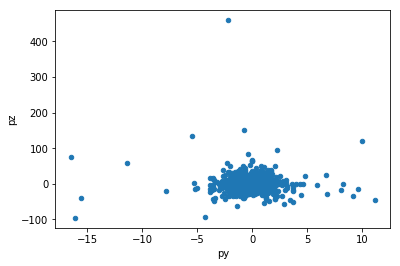

In [4]:
particles_df.plot(kind='scatter', x='py', y='pz')

In [5]:
print(hits_df.shape)
hits_df.head(4)

(120939, 7)


,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.4099,-7.163700,-1502.5,7,2,1
1,2,-55.3361,0.635342,-1502.5,7,2,1
2,3,-83.8305,-1.143010,-1502.5,7,2,1
3,4,-96.1091,-8.241030,-1502.5,7,2,1


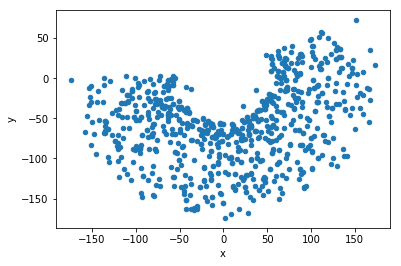

In [6]:
hits_df.head(800).plot(kind='scatter', x='x', y='y')

In [7]:
print(cells_df.shape)
cells_df.head(4)

(664996, 4)


,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087


In [8]:
print(truth_df.shape)
truth_df.head(4)

(120939, 9)


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.4116,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.3385,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.8280,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.1229,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008


Кажется, есть возможность простым поиском соответствующего particle_id в truth_df, восстановить как пространственную траекторию частицы (нашёл строчку с соотвествующим particle_id - взял координаты, нашёл следующую строку с этим же particle_id - взял координаты). Может быть, можно попробовать предсказывать координты следующего хита имея "на руках" координаты текущего, нескольки предыдущих (вплот до точки рождения), заряд, импульс (значения предыдуших импульсов в моменты столкновений - хитов). Ну и можно воостановить не только траекторию "в координатах", но и траекторию в "ячейках" детекторов - hit_id у нас то же в truth_df имеется, а по нему легко воостановить ячейку/блок/детектор. А далее можно взять из таблицы детекторов координаты/матрицу поворота, и например попробовать найти завивисимости чего либо (например количества хитов) от характеристик блока/поворота. Или, ещё лучше - попробовать предсказыать импульс после столкновения, в зависимости от поворота, заряда, импульса в момент столкновения. 

In [9]:
detectors_df = pd.read_csv('datasets/unarch/detectors.csv')

In [10]:
print(detectors_df.shape)
detectors_df.head(4)

(18728, 21)


,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [11]:
submission_df = pd.read_csv('datasets/unarch/sample_submission.csv')

In [12]:
print(submission_df.shape)
submission_df.head(4)

(13741466, 3)


,event_id,hit_id,track_id
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0


In [13]:
train_dataset_dir = 'datasets/unarch/train_100_events'
dataset_filenames = os.listdir(train_dataset_dir)
print(dataset_filenames[:4])
event_ids = []
event_filenames = {}
for filename in dataset_filenames[:20]:
    event_id = filename[5:14]
    print(event_id)
    if event_id not in event_ids:
        event_ids.append(event_id)
    if event_id not in event_filenames:
        event_filenames[event_id] = [filename]
    else:
        event_filenames[event_id].append(filename)

['event000001015-truth.csv', 'event000001022-cells.csv', 'event000001056-cells.csv', 'event000001043-particles.csv']
000001015
000001022
000001056
000001043
000001061
000001035
000001026
000001004
000001081
000001076
000001008
000001057
000001066
000001019
000001083
000001053
000001090
000001001
000001074
000001085


In [14]:
def random_sublist_select(original_list, sublist_size):
    return [original_list[i] for i in random.sample(range(len(original_list)), sublist_size)]

In [15]:
def offset_sublist_select(original_list, sublist_size, offset):
    return original_list[offset:offset + sublist_size]

In [16]:
def select_random_indexses_subset(size, subset_size):
    return random.sample(tuple(range(size)), subset_size) 

In [17]:
def select_offset_indexses_subset(size, subset_size, offset):
    return tuple(range(size))[offset:offset + subset_size]

In [18]:
def read_dataset_filenames_from_dir(path_to_datasets_dir):
    dataset_filenames = os.listdir(path_to_datasets_dir)
    event_filenames = {}
    for filename in dataset_filenames:
        path_to_file = os.path.join(path_to_datasets_dir, filename)
        event_id = filename[5:14]
        if event_id not in event_filenames:
            event_filenames[event_id] = [path_to_file]
        else:
            event_filenames[event_id].append(path_to_file)
    return event_filenames

In [19]:
def select_events(indexes_list, event_names):
    return tuple(event_names[i] for i in indexes_list)

In [20]:
def random_events_select(event_names, subset_size):
    event_names_len = len(event_names)
    indexes = select_random_indexses_subset(event_names_len, subset_size)
    return select_events(indexes, event_names)

In [21]:
def offset_events_select(event_names, subset_size, offset):
    event_names_len = len(event_names)
    indexes = select_offset_indexses_subset(event_names_len, subset_size, offset)
    return select_events(indexes, event_names)

In [22]:
def read_dataset_filenames_random(directory_list, sample_size=0):
    event_grouped_dataset_filenames = {}
    for directory in directory_list:
        dataset_filenames = read_dataset_filenames_from_dir(directory)
        event_names = tuple(dataset_filenames)
        if sample_size > 0:
            event_names = random_events_select(event_names, sample_size)
        dataset_filenames = {event_name: sorted(dataset_filenames[event_name]) for event_name in event_names}
        event_grouped_dataset_filenames.update(dataset_filenames)
    return event_grouped_dataset_filenames    

In [23]:
def read_dataset_filenames_offset(directory_list, sample_size=0, offset=0):
    event_grouped_dataset_filenames = {}
    for directory in directory_list:
        dataset_filenames = read_dataset_filenames_from_dir(directory)
        event_names = tuple(dataset_filenames)
        if sample_size > 0:
            event_names = offset_events_select(tuple(dataset_filenames), sample_size, offset)
        dataset_filenames = {event_name: sorted(dataset_filenames[event_name]) for event_name in event_names}
        event_grouped_dataset_filenames.update(dataset_filenames)
    return event_grouped_dataset_filenames 

In [24]:
def random_select_dataset_filenames(dataset_filenames, sample_size):
    return {
        event_name: dataset_filenames[event_name] for event_name in random_events_select(
            tuple(dataset_filenames),
            sample_size
        )
    }

In [25]:
def offset_select_dataset_filenames(dataset_filenames, sample_size, offset):
    return {
        event_name: dataset_filenames[event_name] for event_name in offset_events_select(
            tuple(dataset_filenames),
            sample_size,
            offset
        )
    }

In [26]:
event_grouped_dataset_filenames = read_dataset_filenames_random(['datasets/unarch/train_1/'], 20)

In [27]:
event_grouped_dataset_filenames

{'000001105': ['datasets/unarch/train_1/event000001105-cells.csv',
  'datasets/unarch/train_1/event000001105-hits.csv',
  'datasets/unarch/train_1/event000001105-particles.csv',
  'datasets/unarch/train_1/event000001105-truth.csv'],
 '000001122': ['datasets/unarch/train_1/event000001122-cells.csv',
  'datasets/unarch/train_1/event000001122-hits.csv',
  'datasets/unarch/train_1/event000001122-particles.csv',
  'datasets/unarch/train_1/event000001122-truth.csv'],
 '000001127': ['datasets/unarch/train_1/event000001127-cells.csv',
  'datasets/unarch/train_1/event000001127-hits.csv',
  'datasets/unarch/train_1/event000001127-particles.csv',
  'datasets/unarch/train_1/event000001127-truth.csv'],
 '000001129': ['datasets/unarch/train_1/event000001129-cells.csv',
  'datasets/unarch/train_1/event000001129-hits.csv',
  'datasets/unarch/train_1/event000001129-particles.csv',
  'datasets/unarch/train_1/event000001129-truth.csv'],
 '000001141': ['datasets/unarch/train_1/event000001141-cells.csv',
 

In [28]:
event_grouped_dataset_filenames_1 = read_dataset_filenames_offset(['datasets/unarch/train_1/'], 20)

In [29]:
event_grouped_dataset_filenames_1

{'000001015': ['datasets/unarch/train_1/event000001015-cells.csv',
  'datasets/unarch/train_1/event000001015-hits.csv',
  'datasets/unarch/train_1/event000001015-particles.csv',
  'datasets/unarch/train_1/event000001015-truth.csv'],
 '000001127': ['datasets/unarch/train_1/event000001127-cells.csv',
  'datasets/unarch/train_1/event000001127-hits.csv',
  'datasets/unarch/train_1/event000001127-particles.csv',
  'datasets/unarch/train_1/event000001127-truth.csv'],
 '000001191': ['datasets/unarch/train_1/event000001191-cells.csv',
  'datasets/unarch/train_1/event000001191-hits.csv',
  'datasets/unarch/train_1/event000001191-particles.csv',
  'datasets/unarch/train_1/event000001191-truth.csv'],
 '000001287': ['datasets/unarch/train_1/event000001287-cells.csv',
  'datasets/unarch/train_1/event000001287-hits.csv',
  'datasets/unarch/train_1/event000001287-particles.csv',
  'datasets/unarch/train_1/event000001287-truth.csv'],
 '000001343': ['datasets/unarch/train_1/event000001343-cells.csv',
 

In [30]:
all_event_grouped_dataset_filenames = read_dataset_filenames_random(['datasets/unarch/train_1/'])

In [31]:
random_selected_dataset_filenames = random_select_dataset_filenames(all_event_grouped_dataset_filenames, 100)

In [32]:
print(len(random_selected_dataset_filenames))
random_selected_dataset_filenames

100


{'000001013': ['datasets/unarch/train_1/event000001013-cells.csv',
  'datasets/unarch/train_1/event000001013-hits.csv',
  'datasets/unarch/train_1/event000001013-particles.csv',
  'datasets/unarch/train_1/event000001013-truth.csv'],
 '000001034': ['datasets/unarch/train_1/event000001034-cells.csv',
  'datasets/unarch/train_1/event000001034-hits.csv',
  'datasets/unarch/train_1/event000001034-particles.csv',
  'datasets/unarch/train_1/event000001034-truth.csv'],
 '000001039': ['datasets/unarch/train_1/event000001039-cells.csv',
  'datasets/unarch/train_1/event000001039-hits.csv',
  'datasets/unarch/train_1/event000001039-particles.csv',
  'datasets/unarch/train_1/event000001039-truth.csv'],
 '000001049': ['datasets/unarch/train_1/event000001049-cells.csv',
  'datasets/unarch/train_1/event000001049-hits.csv',
  'datasets/unarch/train_1/event000001049-particles.csv',
  'datasets/unarch/train_1/event000001049-truth.csv'],
 '000001063': ['datasets/unarch/train_1/event000001063-cells.csv',
 

In [33]:
def create_event_df(event_id, particles_df, truth_df, cells_df, hits_df):
    #return pd.merge(truth_df, hits_df, on='hit_id')
    truth_hits_df = pd.merge(truth_df, hits_df, on='hit_id')
    particles_truth_hits_df = pd.merge(particles_df, truth_hits_df, on='particle_id', how='right')
    #return particles_truth_hits_df
    return pd.merge(cells_df, particles_truth_hits_df, on='hit_id', how='outer')

In [34]:
def read_dataset_to_grouped_by_event_dfs(selected_dataset_filenames):
    event_dfs = {}
    for event_id, event_filenames in selected_dataset_filenames.items():
        event_dfs[event_id] = create_event_df(
            event_id,
            pd.read_csv(event_filenames[2]),
            pd.read_csv(event_filenames[3]),
            pd.read_csv(event_filenames[0]),
            pd.read_csv(event_filenames[1])
        )
    return event_dfs        

In [35]:
def read_dataset_to_grouped_by_event_dfs(selected_dataset_filenames):
    grouped_by_event_dfs = {}
    for event_id, event_filenames in selected_dataset_filenames.items():
        grouped_by_event_dfs[event_id] = (
            pd.read_csv(event_filenames[2]),
            pd.read_csv(event_filenames[3]),
            pd.read_csv(event_filenames[0]),
            pd.read_csv(event_filenames[1])
        )
    return grouped_by_event_dfs 

In [36]:
def read_dataset_to_event_dfs(grouped_by_event_dfs):
    event_dfs = {}
    for event_id, dfs in grouped_by_event_dfs.items():
        event_dfs[event_id] = create_event_df(
            event_id,
            dfs[0],
            dfs[1],
            dfs[2],
            dfs[3]
        )
    return event_dfs 

In [37]:
all(hits_df['hit_id'] == truth_df['hit_id'])

True

In [38]:
event_df = create_event_df(0, particles_df, truth_df, cells_df, hits_df)

In [39]:
event_df.shape

(664996, 26)

In [40]:
grouped_by_event_datasets_df = read_dataset_to_grouped_by_event_dfs(event_grouped_dataset_filenames)

In [41]:
grouped_by_event_datasets_df.keys()

dict_keys(['000002771', '000001862', '000001820', '000002165', '000001434', '000002815', '000001784', '000001122', '000001129', '000002341', '000002565', '000002725', '000001392', '000001141', '000002579', '000001728', '000001519', '000001726', '000001105', '000001127'])

In [43]:
#grouped_by_event_datasets_df['000002231']

In [44]:
event_dfs = read_dataset_to_event_dfs(grouped_by_event_datasets_df)

In [46]:
event_dfs['000002771'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529143 entries, 0 to 529142
Data columns (total 26 columns):
hit_id         529143 non-null int64
ch0            529143 non-null int64
ch1            529143 non-null int64
value          529143 non-null float64
particle_id    529143 non-null int64
vx             434800 non-null float64
vy             434800 non-null float64
vz             434800 non-null float64
px             434800 non-null float64
py             434800 non-null float64
pz             434800 non-null float64
q              434800 non-null float64
nhits          434800 non-null float64
tx             529143 non-null float64
ty             529143 non-null float64
tz             529143 non-null float64
tpx            529143 non-null float64
tpy            529143 non-null float64
tpz            529143 non-null float64
weight         529143 non-null float64
x              529143 non-null float64
y              529143 non-null float64
z              529143 non-null float64


In [47]:
len(event_dfs)

20

In [49]:
not_merged_dfs_0 = grouped_by_event_datasets_df['000002771']

In [50]:
event_cells_0 = not_merged_dfs_1[0]

In [51]:
event_cells_0.isnull()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [54]:
def is_null(df):
    columns_dict = {}
    for column_name in df.columns.tolist():
        columns_dict[column_name] = any(df[column_name].isnull())
    return columns_dict

In [55]:
for event_id, grouped_dfs in grouped_by_event_datasets_df.items():
    print(event_id)
    print("cells:", is_null(grouped_dfs[0]))
    print("hits:", is_null(grouped_dfs[1]))
    print("particles:", is_null(grouped_dfs[2]))
    print("truth:", is_null(grouped_dfs[3]))
    

000002771
cells: {'particle_id': False, 'vx': False, 'vy': False, 'vz': False, 'px': False, 'py': False, 'pz': False, 'q': False, 'nhits': False}
hits: {'hit_id': False, 'particle_id': False, 'tx': False, 'ty': False, 'tz': False, 'tpx': False, 'tpy': False, 'tpz': False, 'weight': False}
particles: {'hit_id': False, 'ch0': False, 'ch1': False, 'value': False}
truth: {'hit_id': False, 'x': False, 'y': False, 'z': False, 'volume_id': False, 'layer_id': False, 'module_id': False}
000001862
cells: {'particle_id': False, 'vx': False, 'vy': False, 'vz': False, 'px': False, 'py': False, 'pz': False, 'q': False, 'nhits': False}
hits: {'hit_id': False, 'particle_id': False, 'tx': False, 'ty': False, 'tz': False, 'tpx': False, 'tpy': False, 'tpz': False, 'weight': False}
particles: {'hit_id': False, 'ch0': False, 'ch1': False, 'value': False}
truth: {'hit_id': False, 'x': False, 'y': False, 'z': False, 'volume_id': False, 'layer_id': False, 'module_id': False}
000001820
cells: {'particle_id': F

hits: {'hit_id': False, 'particle_id': False, 'tx': False, 'ty': False, 'tz': False, 'tpx': False, 'tpy': False, 'tpz': False, 'weight': False}
particles: {'hit_id': False, 'ch0': False, 'ch1': False, 'value': False}
truth: {'hit_id': False, 'x': False, 'y': False, 'z': False, 'volume_id': False, 'layer_id': False, 'module_id': False}
000001127
cells: {'particle_id': False, 'vx': False, 'vy': False, 'vz': False, 'px': False, 'py': False, 'pz': False, 'q': False, 'nhits': False}
hits: {'hit_id': False, 'particle_id': False, 'tx': False, 'ty': False, 'tz': False, 'tpx': False, 'tpy': False, 'tpz': False, 'weight': False}
particles: {'hit_id': False, 'ch0': False, 'ch1': False, 'value': False}
truth: {'hit_id': False, 'x': False, 'y': False, 'z': False, 'volume_id': False, 'layer_id': False, 'module_id': False}
